# Building your own regression methods

In this first part of the assignment, you will build and run your own simple versions of regression methods. For these questions, you may not use any package other than `numpy`. (In particular, you may not use `sklearn.`)

[data.npz](https://prod-files-secure.s3.us-west-2.amazonaws.com/500c04b7-1a6e-4d1d-9794-74feb55ce8f4/4704e4fe-c906-4c3b-8955-d8176987efd6/data.npz)

You are given a file `data.npz` with training data consisting of 1,400 examples in 3 dimensions and test data consisting of 1,400 examples in 3 dimensions. You can access the data as

```python
stuff=np.load("data.npz")
X_trn = stuff["X_trn"]
y_trn = stuff["y_trn"]
X_val = stuff["X_val"]
y_val = stuff["y_val"]
```

**Question 1:** Write a method to do K-nearest neighbors regression. Your method should have the following signature:

```python
def KNN_reg_predict(X_trn, y_trn, x, K):
    # do stuff here
    return y
```

where `X_trn` is a 2D array of training inputs, `y_trn` is a 1D array of training outputs, `x` is a 1D array of a single input to make predictions for, and `K` is the number of neighbors. The return value `y` is just a scalar.

Include your code as text in your report, and as code in your zip file. You may break ties arbitrarily.

In [54]:
import numpy as np
import matplotlib.pyplot as plt

stuff=np.load("data.npz")
X_trn = stuff["X_trn"] # 2d array
y_trn = stuff["y_trn"] # 1d array
X_val = stuff["X_val"] 
y_val = stuff["y_val"]


def KNN_reg_predict(X_trn, y_trn, x, K):
    '''
    Args:
    X_trn is a 2d array
    y_trn is a 1d array
    x is a 1d array (predict from x)
    K is the number of neighbors to avg over
    '''
    
    distances = np.linalg.norm(X_trn - x, axis=1) # Subtract rows of X by x and get the distance

    # get the indices of the sorted distances
    sorted_indices = np.argsort(distances) 

    # select the k closest points
    y = (1/K) * np.sum(y_trn[sorted_indices[:K]])
    return y

y = []
for i in range(1400):
    y.append(KNN_reg_predict(X_trn, y_trn, X_val[i,:], 10))


**Question 2:** For each value of `K`  between 1 and 10, use your code from the previous question to calculate the mean of training error and test error, evaluated using the squared loss. Give your answer as a 10x2 table, with one row for each value of `K` and one column for each of training / test error.

Now, repeat the process, except using absolute error instead of squared error. 

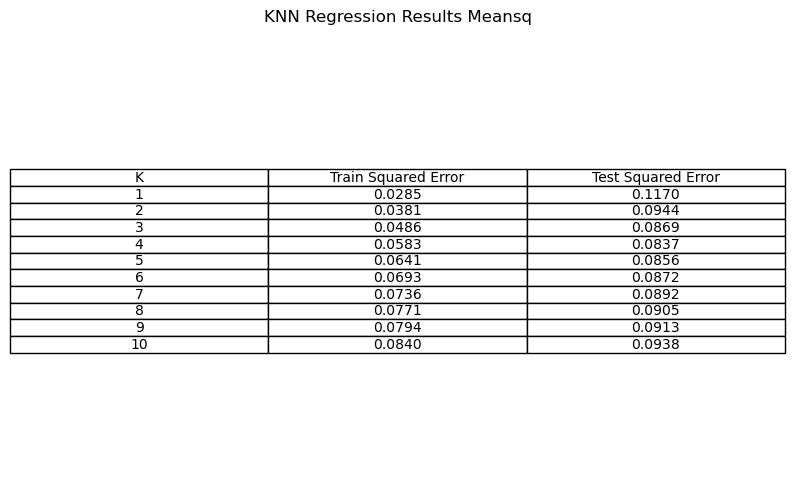

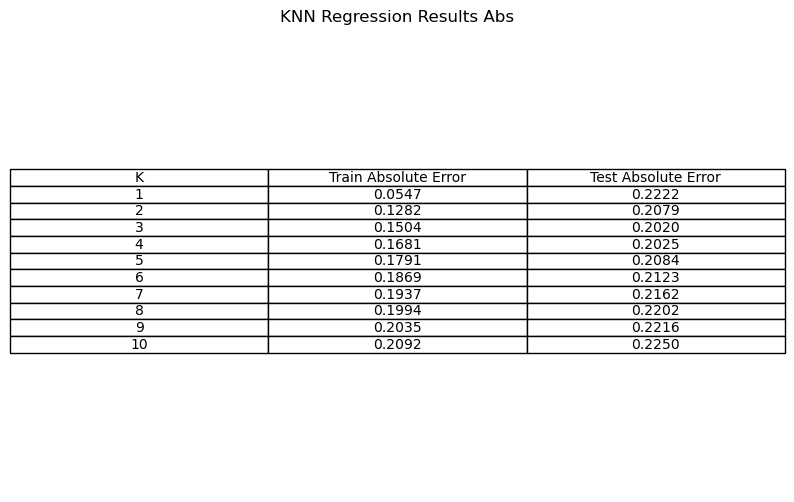

In [55]:
import numpy as np
import matplotlib.pyplot as plt

stuff = np.load("data.npz")
X_trn = stuff["X_trn"]  # 2d array
y_trn = stuff["y_trn"]  # 1d array
X_val = stuff["X_val"] 
y_val = stuff["y_val"]

def KNN_reg_predict(X_trn, y_trn, x, K):
    '''
    Args:
    X_trn is a 2d array
    y_trn is a 1d array
    x is a 1d array (predict from x)
    K is the number of neighbors to avg over
    '''
    # compute distances
    distances = np.linalg.norm(X_trn - x, axis=1)
    
    # get indices of sorted distances
    sorted_indices = np.argsort(distances)
    
    # take the K closest neighbors
    y = np.sum(y_trn[sorted_indices[:K]]) / K
    
    return y

# statistics dictionary initialization
statistics = {
    'sq_train_err': [],
    'sq_test_err': [],
    'abs_mean_err_train': [],
    'abs_mean_err_test': []
}

for K in range(1, 11):  # K from 1 to 10
    sq_train_err = 0
    sq_test_err = 0
    abs_mean_err_train = 0
    abs_mean_err_test = 0

    # calculate predictions and errors for training data
    for i in range(len(X_trn)):
        y_pred_trn = KNN_reg_predict(X_trn, y_trn, X_trn[i, :], K)
        sq_train_err += (y_trn[i] - y_pred_trn) ** 2
        abs_mean_err_train += np.abs(y_trn[i] - y_pred_trn)

    # calculate predictions and errors for validation data (test)
    for i in range(len(X_val)):
        y_pred_val = KNN_reg_predict(X_trn, y_trn, X_val[i, :], K)
        sq_test_err += (y_val[i] - y_pred_val) ** 2
        abs_mean_err_test += np.abs(y_val[i] - y_pred_val)

    # store the mean errors for this K
    statistics['sq_train_err'].append(sq_train_err / len(X_trn))
    statistics['sq_test_err'].append(sq_test_err / len(X_val))
    statistics['abs_mean_err_train'].append(abs_mean_err_train / len(X_trn))
    statistics['abs_mean_err_test'].append(abs_mean_err_test / len(X_val))

fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')

data = []
headers = ['K', 'Train Squared Error', 'Test Squared Error']
for K in range(1, 11):
    data.append([
        K,
        f"{statistics['sq_train_err'][K-1]:.4f}",
        f"{statistics['sq_test_err'][K-1]:.4f}",
    ])

table = ax.table(cellText=data, colLabels=headers, loc='center',
                cellLoc='center')

plt.title('KNN Regression Results Meansq')
plt.savefig('Q2A knn_results1.png')

fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')

data = []
headers = ['K', 'Train Absolute Error', 'Test Absolute Error']
for K in range(1, 11):
    data.append([
        K,
        f"{statistics['abs_mean_err_train'][K-1]:.4f}",
        f"{statistics['abs_mean_err_test'][K-1]:.4f}"
    ])

table = ax.table(cellText=data, colLabels=headers, loc='center',
                cellLoc='center')

plt.title('KNN Regression Results Abs')
plt.savefig('Q2B knn_results2.png')


**Question 3:** Write a method to evaluate a linear regression model. Your method should have the following signature:

```python
def linear_reg_predict(x, w):
    # do stuff here
    return y
```

where `x` is a 1D array with a single input, and `w` is a 1D array of regression coefficients of the same length. The return value `y` is just a scalar.

Include your method as text in your report, and as code in your zip file.

In [56]:
def linear_reg_predict(x,w):
    y = x @ w.T
    return y


**Question 4:** Write a method to train a ridge regression model. Your method should have the following signature:

```python
def linear_reg_train(X_trn, y_trn, λ):
    # do stuff here
    return w
```

where `X_trn` is a 2D array of training inputs, `y_trn` is a 1D array of training outputs, and `λ` is the regularization constant. (Use `l` instead of `λ` if you don't like Greek letters in your code.) The return value `w` is a 1D array of regression coefficients of the same size as `X_trn.shape[1]`. You should return the value `w` such that

$$
\sum_{n=1}^N ( w^\top x^{(n)}-y^{(n)})^2 + \lambda \Vert w \Vert^2
$$

is minimized, where $x^{(n)}$ represents the different rows of `X_trn` and $y^{(n)}$ represents the entries of `y_trn`. Include your method as text in your report, and as code in your zip file.

*Note*: In these questions, you do not need to add a “bias term”. Just fit a linear model of the form $f_w(x)=w^\top x$.

In [57]:
import numpy as np

stuff = np.load("data.npz")
X_trn = stuff["X_trn"]  # 2d array
y_trn = stuff["y_trn"]  # 1d array
X_val = stuff["X_val"] 
y_val = stuff["y_val"]



def linear_reg_train(X_trn, y_trn, l):   
    x_shape = X_trn.shape[1]
    w = np.linalg.inv(X_trn.T @ X_trn + (l * np.eye(x_shape))) @ X_trn.T @ y_trn 
    return w


**Question 5:** Repeat the evaluation process from question 2, except with different values of `λ` on the rows. Use the values λ=0, 0.1, 1, 10, 100, 1000.

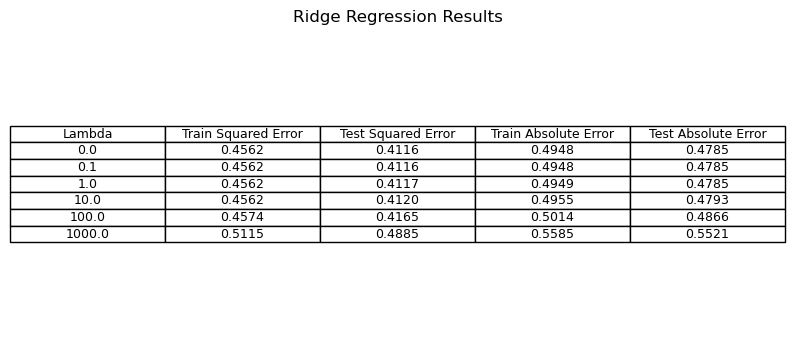

In [58]:
lam = [0, 0.1, 1, 10, 100, 1000]
statistics = {'sq_train_err': [], 'sq_test_err': [], 'abs_mean_err_train': [], 'abs_mean_err_test': []}

for l in lam:
    sq_train_err = 0
    sq_test_err = 0
    abs_mean_err_train = 0
    abs_mean_err_test = 0
    w = linear_reg_train(X_trn, y_trn, l) 

    y_pred_trn = linear_reg_predict(X_trn, w)
    for idx in range(len(X_trn)):
        sq_train_err += (y_trn[idx] - y_pred_trn[idx]) **2
        abs_mean_err_train += np.abs(y_trn[idx] - y_pred_trn[idx])

    # calculate predictions and errors for validation data (test)
    y_pred_val = linear_reg_predict(X_val, w)
    for idx in range(len(X_val)):
        sq_test_err += (y_val[idx] - y_pred_val[idx]) ** 2
        abs_mean_err_test += np.abs(y_val[idx] - y_pred_val[idx])

    # store the mean errors for this lambda
    statistics['sq_train_err'].append(float(sq_train_err / len(X_trn)))
    statistics['sq_test_err'].append(float(sq_test_err / len(X_val)))
    statistics['abs_mean_err_train'].append(float(abs_mean_err_train / len(X_trn)))
    statistics['abs_mean_err_test'].append(float(abs_mean_err_test / len(X_val)))


# I already wrote this... sorry if it is clutter.
###################################
# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('off')

# Create table data
data = []
headers = ['Lambda', 'Train Squared Error', 'Test Squared Error', 'Train Absolute Error', 'Test Absolute Error']
for idx, l in enumerate(lam):
    data.append([
        f"{l:.1f}",
        f"{statistics['sq_train_err'][idx]:.4f}",
        f"{statistics['sq_test_err'][idx]:.4f}",
        f"{statistics['abs_mean_err_train'][idx]:.4f}",
        f"{statistics['abs_mean_err_test'][idx]:.4f}"
    ])

# Create table
table = ax.table(cellText=data, colLabels=headers, loc='center',
                cellLoc='center')


plt.title('Ridge Regression Results')
plt.savefig('Q5 ridge_results.png')



**Question 6:** The errors you get in the previous question depend on the particular dataset you used. Consider each of the following errors:

1. Squared training error.

2. Squared test error.

3. Absolute training error.

4. Absolute test error.

For each of the errors above, which of the following describes how it changes as `λ` increases for *all* datasets? Pick one of (A)-(E), and explain why in at most 2 sentences:

A) Error always increases (or stays constant) for *all possible datasets*.

B) Error always decreases (or stays constant) for *all possible datasets*.

C) Error always goes down for a while, then goes up *for all possible datasets*. (It could stay constant in either phase.)

D) Error always goes up for a while, then goes down *for all possible datasets*. (It could stay constant in either phase.)

E) None of the above are guaranteed to happen. On some datasets, different things happen, and none of the above always happen.

___
# Soln
**Answer: A**
Because increasing λ constrains the model's flexibility.

This leads to an uptick in training error as the model's capacity to conform to the data diminishes; unchanged training error if the model was sufficient at initallization

Regarding test error, while we often observe fluctuations, there's no guarantee of improvement for every conceivable dataset.
Increasing λ never enhances the model's ability to align with the data - it can only maintain its current fit or deteriorate. This principle applies to both training and test data for squared and absolute metrics.
___


**Question 7:** Write a method to evaluate a regression stump. Your method should have the following signature:

```python
def reg_stump_predict(x, dim, thresh, c_left, c_right):
    # do stuff here
    return y
```

Your function should return `c_left` if `x[dim]<=thresh` and `c_right` otherwise.

In [59]:
def reg_stump_predict(x, dim, thresh, c_left, c_right):
    return c_left if x[dim] <= thresh else c_right


**Question 8:** Write a method to train a regression stump. Your method should have the following signature:

```python
def reg_stump_train(X_trn, y_trn):
    # do stuff here
    return dim, thresh, c_left, c_right
```

where `X_trn` is a 2D array of training inputs, and `y_trn` is a 1D array of training outputs. The values `dim`, `thresh`, `c_left`, and `c_right` are as in the prediction function above. You should return the values such that

$$
\sum_{n=1}^N \left( f(x^{(n)}) - y^{(n)} \right) ^2
$$
is minimized, where $f$ represents your function from the previous question.

Include your method as text in your report and as code in your zip file.

In [60]:
import matplotlib.pyplot as plt

def reg_stump_train(X_trn, y_trn):
    best_loss = np.inf

    N, d = X_trn.shape
    dim = d

    for feature in range(d): # Extract features
        sorted_idxs = np.argsort(X_trn[:, feature]) # The use of sorting helps find splits better
        X_sorted = X_trn[sorted_idxs]

        for idx in range(1, N): # loop over samples
            # The threshold will be determined between two succesive points, reducing the amount of compute needed
            curr_thresh = (X_sorted[idx - 1, feature] + X_sorted[idx, feature]) / 2
            left_mask = X_trn[:, feature] <= curr_thresh
            right_mask = X_trn[:, feature] > curr_thresh
            
            y_left = np.mean(y_trn[left_mask])
            y_right = np.mean(y_trn[right_mask])

            err_left = np.sum((y_trn[left_mask] - y_left) **2)
            err_right = np.sum((y_trn[right_mask] - y_right) **2 )
            err = err_left + err_right

            if err < best_loss:
                dim = feature # Store the current dimension that we are splitting our data across
                best_loss = err_left + err_right 
                thresh = curr_thresh # New splitting rule
                c_left = y_left
                c_right = y_right


    return dim, thresh, c_left, c_right


dim, thresh, c_left, c_right = reg_stump_train(X_trn, y_trn)

y_pred = np.array([reg_stump_predict(x, dim, thresh, c_left, c_right) for x in X_val])


**Question 9:** For the same data as above, train and evaluate a regression stump using your code from the previous two questions. Give a table with the training squared error, the test squared error, the training absolute error, and the test absolute error.

*Note*: You should report the *mean* error over each dataset (training set and test set).


In [61]:
dim, thresh, c_left, c_right = reg_stump_train(X_trn, y_trn)

y_pred_train = np.where(X_trn[:, dim] <= thresh, c_left, c_right)
y_pred_test = np.where(X_val[:, dim] <= thresh, c_left, c_right)

train_sq_error = np.mean((y_trn - y_pred_train)**2)
test_sq_error = np.mean((y_val - y_pred_test)**2)
train_abs_error = np.mean(np.abs(y_trn - y_pred_train))
test_abs_error = np.mean(np.abs(y_val - y_pred_test))

fig, ax = plt.subplots(figsize=(8, 3))
ax.axis('off')


data = [[
    f"{train_sq_error:.4f}",
    f"{test_sq_error:.4f}",
    f"{train_abs_error:.4f}",
    f"{test_abs_error:.4f}"
]]
headers = ['Train Squared Error', 'Test Squared Error', 'Train Absolute Error', 'Test Absolute Error']

table = ax.table(cellText=data, colLabels=headers, loc='center',
                cellLoc='center')


plt.title('Regression Stump Results')
plt.savefig('Q9 Stump_results.png')


# Running methods on real data

[big_data.npz](https://prod-files-secure.s3.us-west-2.amazonaws.com/500c04b7-1a6e-4d1d-9794-74feb55ce8f4/02d8602e-c47f-416d-b41e-90abee5ca1ee/big_data.npz)

For the following questions, you will use a larger dataset, given as `big_data.npz`. This file contains 10,000 training and 10,000 validation examples. There are 19 dimensions. (The first of  these is 1.0, so you do not need to add a bias term yourself.)

For each of the following methods, compute the mean training and test error. In all cases, use squared error. You may use methods from `sklearn`, or you may implement these methods yourself.

In [62]:
import numpy as np
from sklearn.preprocessing import StandardScaler

stuff = np.load("big_data.npz")
X_trn = stuff["X_trn"]  # 2d array
y_trn = stuff["y_trn"]  # 1d array
X_val = stuff["X_val"]
y_val = stuff["y_val"]

scaler = StandardScaler()
X_trn = scaler.fit_transform(X_trn)
X_val = scaler.transform(X_val)


**Question 10:** K-nearest neighbors regression, with the following values of `K`: 1, 2, 5, 10, 20, 50.

In [72]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
k_vals = [1, 2, 5, 10, 20, 50]
train_errors = []
test_errors = []

for k in k_vals:
    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(X_trn, y_trn)
    
    y_train_pred = neigh.predict(X_trn)
    train_mse = mean_squared_error(y_trn, y_train_pred)
    train_errors.append(train_mse)
    
    y_val_pred = neigh.predict(X_val)
    test_mse = mean_squared_error(y_val, y_val_pred)
    test_errors.append(test_mse)

data = []
for i in range(len(k_vals)):
    data.append([k_vals[i], f"{train_errors[i]:.4f}", f"{test_errors[i]:.4f}"])

headers = ['K', 'Train Squared Error', 'Test Squared Error']

fig, ax = plt.subplots(figsize=(8, 6))
ax.axis('off')

table = ax.table(cellText=data, colLabels=headers, loc='center', cellLoc='center')

ax.axis('off')

plt.title('K-Nearest Neighbors Results')
plt.savefig('Q10 KNN_results_sklearn.png')

ImportError: cannot import name 'KNeighborsRegressor' from 'sklearn' (C:\Users\jason\anaconda3\Lib\site-packages\sklearn\__init__.py)


**Question 11:** Regression trees trained to (greedily) minimize squared error. Grow regression trees to the following maximum depths: 1,2,3,4,5.

In [64]:
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

depths = [1, 2, 3, 4, 5]
train_errors = []
test_errors = []

for depth in depths:
    regressor = DecisionTreeRegressor(max_depth=depth)
    regressor.fit(X_trn, y_trn)
    
    y_train_pred = regressor.predict(X_trn)
    train_mse = mean_squared_error(y_trn, y_train_pred)
    train_errors.append(train_mse)
    
    y_val_pred = regressor.predict(X_val)
    test_mse = mean_squared_error(y_val, y_val_pred)
    test_errors.append(test_mse)

data = []
for i in range(len(depths)):
    data.append([depths[i], f"{train_errors[i]:.4f}", f"{test_errors[i]:.4f}"])

headers = ['K', 'MeanSq Train Error', 'MeanSq Test Error']

fig, ax = plt.subplots(figsize=(8, 6))
ax.axis('off')

table = ax.table(cellText=data, colLabels=headers, loc='center',
                 cellLoc='center')

ax.axis('off')

plt.title('Tree Results')
plt.savefig('Q11 Tree_results_sklearn.png')


**Question 12:** Ridge regression with each of the following regularization constants λ: 0, 1, 10, 100, 1000, 10000.

Note: You should *train* to minimize the *sum* of error with the regularization penalty, i.e. $\sum_{n=1}^N (w^\top x^{(n)} - y^{n})^2 + \lambda \Vert w \Vert^2$. However, you should still *report* *mean* errors, without any regularization penalty included, just like with any other method.

In [70]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error


# Load the data
stuff = np.load("big_data.npz")
X_trn = stuff["X_trn"]
y_trn = stuff["y_trn"]
X_val = stuff["X_val"] 
y_val = stuff["y_val"]

alphas = [0, 1, 10, 100, 1000, 10000]

train_errors = []
test_errors = []

for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_trn, y_trn)
    
    y_train_pred = model.predict(X_trn)
    y_val_pred = model.predict(X_val)
    
    train_mse = mean_squared_error(y_trn, y_train_pred)
    test_mse = mean_squared_error(y_val, y_val_pred)
    
    train_errors.append(train_mse)
    test_errors.append(test_mse)

fig, ax = plt.subplots(figsize=(8, 6))
ax.axis('off')

data = []
headers = ['Lambda', 'MeanSq Training Error', 'MeanSq Test Error']
for alpha, train_error, test_error in zip(alphas, train_errors, test_errors):
    data.append([
        f"{alpha}",
        f"{train_error:.4f}",
        f"{test_error:.4f}"
    ])

table = ax.table(cellText=data, colLabels=headers, loc='center',
                cellLoc='center')


plt.title('Ridge Regression Results')
plt.savefig('Q12 ridge_complete_results.png')


**Question 13:** Lasso regression with each of the following regularization constants λ: 0, 0.001, 0.01, 0.1, 1, 10.

Again, train to minimize the sum of the error and the regression penalty, i.e. $\sum_{n=1}^N (w^\top x^{(n)} - y^{(n)})^2 + \lambda \Vert w \Vert_1$, but report mean errors without any regularization constant included.

*Hint*: The Lasso method in `sklearn` minimizes an expression that we would write in our notation as  $\frac{1}{2 N} \sum_{n=1}^N (w^\top x^{(n)} - y^{(n)})^2 + \alpha \Vert w \Vert_1$. You must choose $\alpha$ carefully so that solving this is equivalent to solving the stated problem with a given $\lambda$.

In [71]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

n_samples = X_trn.shape[0]
lambdas = [0, 0.001, 0.01, 0.1, 1, 10]
alphas = [lam * (2 * n_samples) for lam in lambdas]

train_errors = []
test_errors = []

for alpha, lam in zip(alphas, lambdas):
    model = Lasso(alpha=alpha)
    model.fit(X_trn, y_trn)

    y_train_pred = model.predict(X_trn)
    y_val_pred = model.predict(X_val)
    
    train_mse = mean_squared_error(y_trn, y_train_pred)
    test_mse = mean_squared_error(y_val, y_val_pred)
    
    train_errors.append(train_mse)
    test_errors.append(test_mse)

fig, ax = plt.subplots(figsize=(8, 6))
ax.axis('off')

data = []
headers = ['Lambda', 'MeanSq Training Error', 'MeanSq Test Error']
for lambdas, train_error, test_error in zip(lambdas, train_errors, test_errors):
    data.append([
        f"{lambdas}",
        f"{train_error:.4f}",
        f"{test_error:.4f}"
    ])

table = ax.table(cellText=data, colLabels=headers, loc='center',
                cellLoc='center')


plt.title('Lasso Regression Results')
plt.savefig('Q13 lasso_complete_results_sklearn.png')

C:\Users\jason\anaconda3\Lib\site-packages\sklearn\base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\jason\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\jason\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.519e+03, tolerance: 1.018e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinat